In [10]:
import numpy as np
import utils

In [11]:
# Load Image and blur
x,shape = utils.load_normalize_image("images/H.png") # change this to image path of interest
spread = [10,10] # use smaller spread like [3,3] for more real images
A = utils.build_A(spread, shape)
b = utils.blur_and_noise(x,A,0.001,shape)

Blurred H
Naive Least Squares Solution
1st Derivative Results
Error: 0.3673514251371763
Graph Laplacian Results
Error: 0.37283031511312953
Identity
Error: 0.38440214910328835


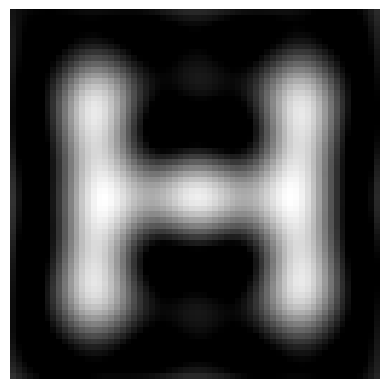

In [12]:
# First derivative L
L_derivative = utils.FirstDerOperator_2D(shape[0])

#identity 
L_id = np.identity(shape[0]*shape[1])

# Pick a lambda and solve and show results for fixed lambda
lamb = 0.000488

print("Blurred H")
utils.save_vec(b,shape,"result_figs/blurred_H.png")

# Construct naive solution
print("Naive Least Squares Solution")
U,S,VH = np.linalg.svd(A)
naive = VH.T@(np.diag(1/S)@U.T@b)
utils.save_vec(naive,shape,"naive_sol.png")

# First derivative regularization
x_tick = utils.deblur_2norm(b,L_derivative,A,lamb)
print("1st Derivative Results")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.save_vec(x_tick,shape,"result_figs/D1_L2.png")
d1_l2_x_tick = np.copy(x_tick)

# Generate graph L from first derivative guess
sigma = 1/100 # sigma value
R = 5 # threshold value for neighbor distance
L_graph = utils.generate_graph_laplacian(d1_l2_x_tick,R,sigma,shape) 

# Graph Laplacian Regularization
x_tick = utils.deblur_2norm(b,L_graph,A,lamb)
print("Graph Laplacian Results")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.save_vec(x_tick,shape,"result_figs/GL_L2.png")

#Identity Matrix Regularization
x_tick = utils.deblur_2norm(b,L_id,A,lamb)
print("Identity")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.save_vec(x_tick,shape,"result_figs/identity_L2.png")

### Now optimize Lambda

Graph Laplacian Results lambda = 0.062500
Error: 0.2810112968403661
1st Derivative Results lambda = 0.000488
Error: 0.36715893021736135
1st Derivative Results lambda = 0.000122
Error: 0.3742231466527804


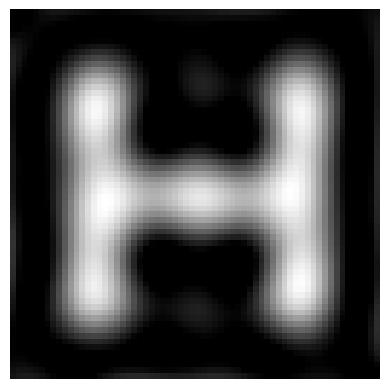

In [9]:
x_tick,lamb_graph = utils.deblur_2norm_lambda_iteration(b,x,L_graph,A)
print(f"Graph Laplacian Results lambda = {lamb_graph:.6f}")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.save_vec(x_tick,shape,"result_figs/GL_L2_lambda_opt.png")


x_tick,lamb_derivative = utils.deblur_2norm_lambda_iteration(b,x,L_derivative,A)
print(f"1st Derivative Results lambda = {lamb_derivative:.6f}")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.save_vec(x_tick,shape,"result_figs/D1_L2_lambda_opt.png")

x_tick,lamb_derivative = utils.deblur_2norm_lambda_iteration(b,x,L_id,A)
print(f"1st Derivative Results lambda = {lamb_derivative:.6f}")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.save_vec(x_tick,shape,"result_figs/identity_L2_lambda_opt.png")

### Now the same but for the 1 norm

1st Derivative Results
Error: 0.20083492935751032


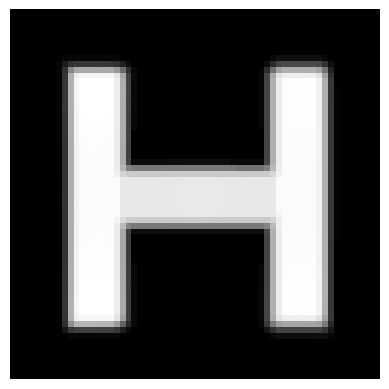

Graph Laplacian Results
Error: 0.24113089010247687


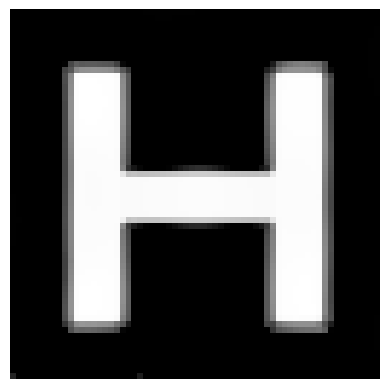

1st Identity Results
Error: 0.28305868572157844


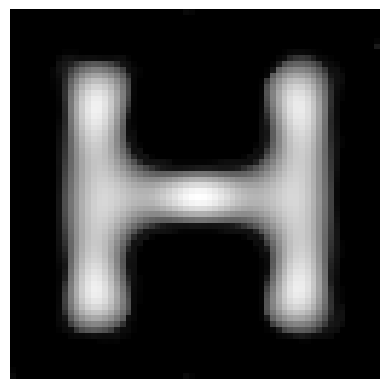

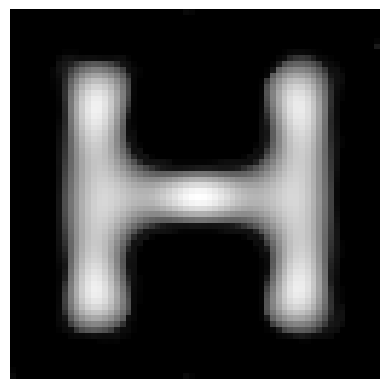

In [7]:
lamb=lamb/2

x_tick = utils.deblur_1norm(b,L_derivative,A,lamb,iter_limit=10)
print("1st Derivative Results")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.display_vec(x_tick,shape)
utils.save_vec(x_tick,shape,"result_figs/D1_L1.png")
d1_l1_x_tick = np.copy(x_tick)

x_tick = utils.deblur_1norm(b,utils.generate_graph_laplacian(d1_l1_x_tick,R,sigma,shape) ,A,lamb,iter_limit=10)
print("Graph Laplacian Results")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.display_vec(x_tick,shape)
utils.save_vec(x_tick,shape,"result_figs/GL_L1_seeded.png")

x_tick = utils.deblur_1norm(b,L_id,A,lamb,iter_limit=10)
print("1st Identity Results")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.display_vec(x_tick,shape)
utils.save_vec(x_tick,shape,"result_figs/identity_L1.png")

In [ ]:
# optimizing over lambda
x_tick,lamb_graph = utils.deblur_1norm_lambda_iteration(b,x,L_graph,A)
print(f"Graph Laplacian Results lambda = {lamb_graph:.6f}")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.display_vec(x_tick,shape)


x_tick,lamb_derivative = utils.deblur_1norm_lambda_iteration(b,x,L_derivative,A)
print(f"1st Derivative Results lambda = {lamb_derivative:.6f}")
print(f"Error: {np.linalg.norm(x_tick - x)/np.linalg.norm(x)}")
utils.display_vec(x_tick,shape)